In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [26]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9  * X + 2 + np.random.randn(200,1)

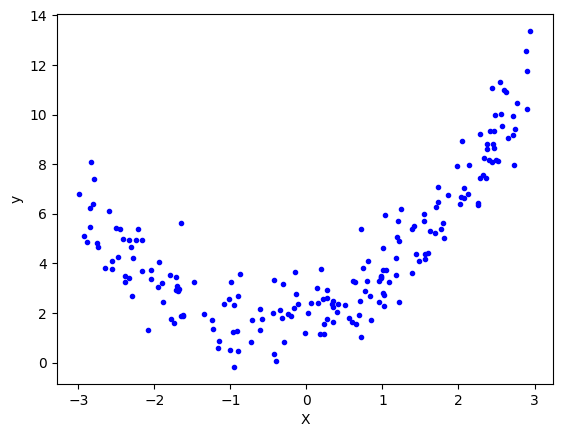

In [27]:
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size = 0.2,
                                                       random_state =0)

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.35536416444150987

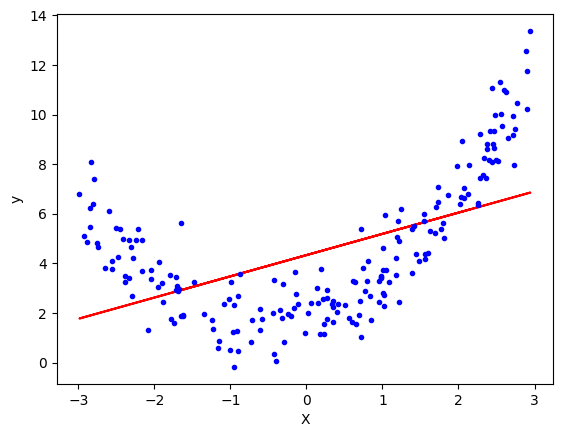

In [32]:
plt.plot(X_train,lr.predict(X_train),"r-")
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [35]:
## Applying Polynomial Linear Regression
poly = PolynomialFeatures(degree = 2  ) # include_bias = False
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [36]:
print(X_train[0])
print(X_train_trans[0])

[-1.62901121]
[ 1.         -1.62901121  2.65367753]


In [37]:
lr = LinearRegression()
lr.fit(X_train_trans , y_train)
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)


0.9031651096136668

In [38]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92277905 0.81583819]]
[1.84840325]


In [39]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_trans = poly.transform(X_new)
y_new = lr.predict(X_new_trans)

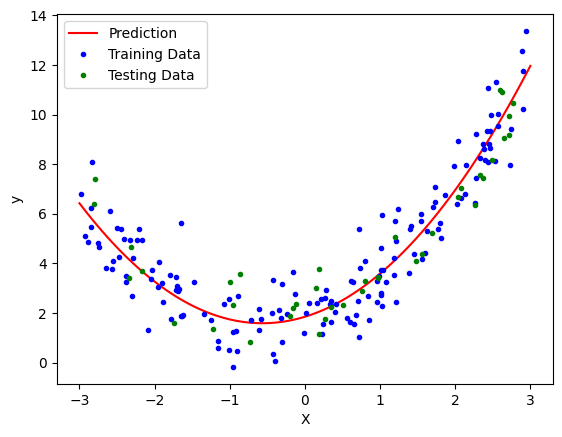

In [41]:
plt.plot(X_new,y_new,"r-",label="Prediction")
plt.plot(X_train,y_train,"b.",label="Training Data")
plt.plot(X_test,y_test,"g.",label="Testing Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

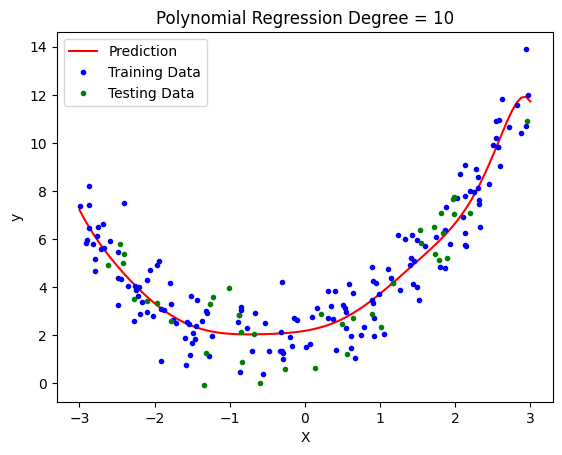

In [46]:
def polynomial_regression(degree):
  X = 6 * np.random.rand(200,1) - 3
  y = 0.8 * X**2 + 0.9  * X + 2 + np.random.randn(200,1)

  X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size = 0.2,
                                                         random_state = 0)

  poly = PolynomialFeatures(degree = degree)
  X_train_trans = poly.fit_transform(X_train)
  X_test_trans = poly.transform(X_test)

  lr = LinearRegression()
  lr.fit(X_train_trans , y_train)


  X_new = np.linspace(-3,3,100).reshape(100,1)
  X_new_trans = poly.transform(X_new)
  y_new = lr.predict(X_new_trans)

  plt.plot(X_new,y_new,"r-",label="Prediction")
  plt.plot(X_train,y_train,"b.",label="Training Data")
  plt.plot(X_test,y_test,"g.",label="Testing Data")
  plt.title(f"Polynomial Regression Degree = {degree}")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.legend()
  plt.show()

polynomial_regression(10)

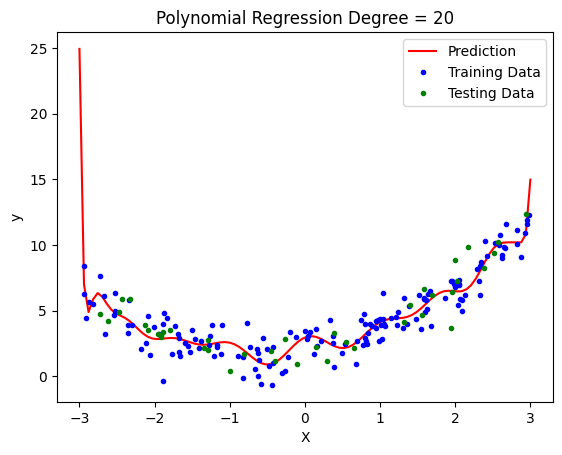

In [47]:
polynomial_regression(20)

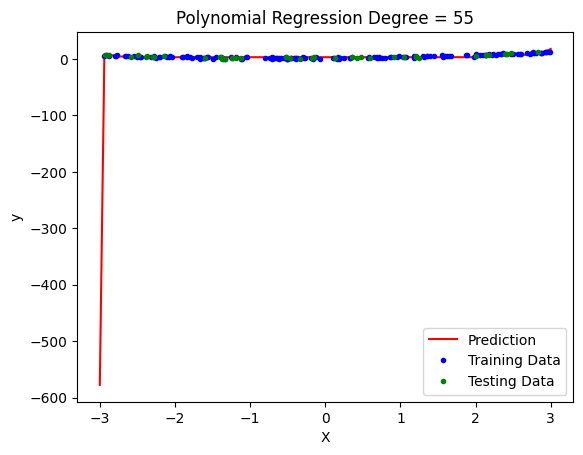

In [48]:
polynomial_regression(55)

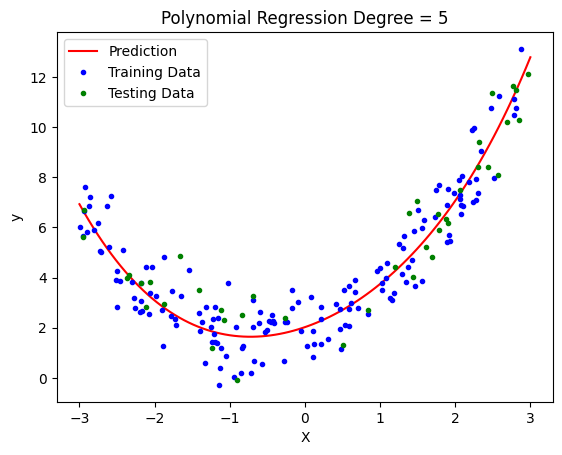

In [49]:
polynomial_regression(5)

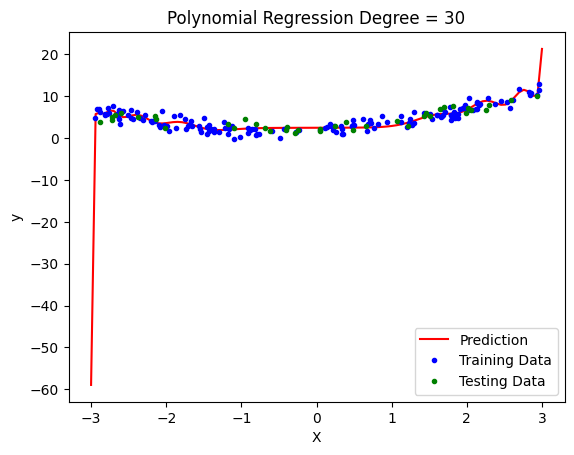

In [51]:
polynomial_regression(30)